Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
company = pd.read_csv('Company_Data.csv')
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.shape

(400, 11)

In [5]:
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

##### let's plot pair plot to visualise the attributes all at once

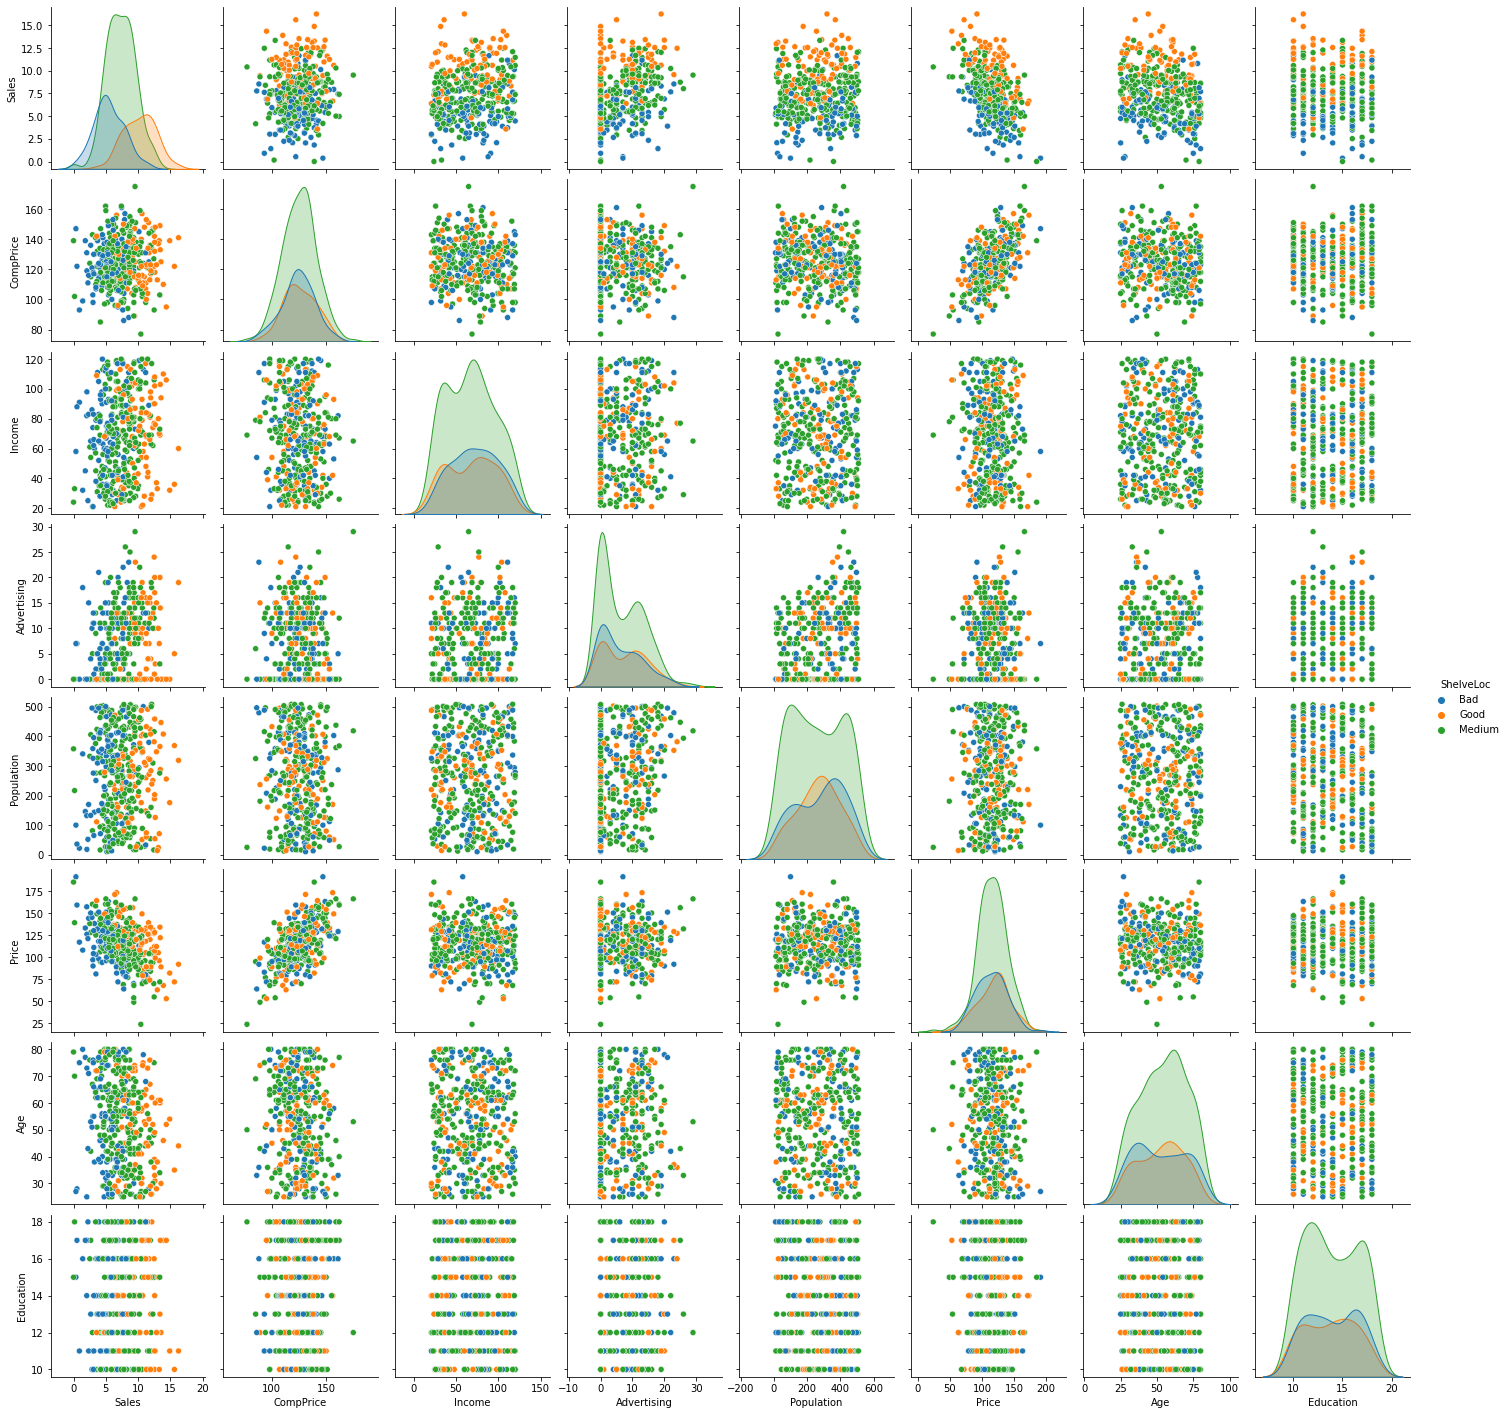

In [6]:
sns.pairplot(data=company, hue='ShelveLoc')

In [7]:
encode = ce.OrdinalEncoder(cols = ['ShelveLoc', 'Urban', 'US'])
comp1 = encode.fit_transform(company)

In [8]:
compval = []
for value in company['Sales']:
    if value <=7.49:
        compval.append('low')
    else:
        compval.append('high')

comp1['sales'] = compval

In [9]:
comp1

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          1   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          3   59   
3     7.40        117     100            4         466     97          3   55   
4     4.15        141      64            3         340    128          1   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          3   55   
397   7.41        162      26           12         368    159          3   40   
398   5.94        100      79            7         284     95          1   50   
399   9.71        134      37            0          27    120          2   49   

     Education  Urban  US sales  
0           17      1   1  high  
1           10      1   1  high  
2           12      1   1  high  
3           14      1   1   low  
4           13      1   2   low  
..         ...    ...  ..   ...  
395         14      1   1  high  
396         11      2   1   low  
397         18      1   1   low  
398         12      1   1   low  
399         16      1   1  high  

[400 rows x 12 columns]

##### Splitting data into training and testing data set

In [10]:
x = comp1.drop(['sales', 'Sales'], axis=1)
y = comp1['sales']

In [11]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          1   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          3   59   
3          117     100            4         466     97          3   55   
4          141      64            3         340    128          1   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          3   55   
397        162      26           12         368    159          3   40   
398        100      79            7         284     95          1   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   2  
..         ...    ...  ..  
395         14      1   1  
396         11      2   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [12]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales, Length: 400, dtype: object

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40) 

## Building Decision Tree Classifier using Entropy Criteria

In [14]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
pred1 = model.predict(x_test)

print('Test Data Accuracy is :', accuracy_score(y_test, pred1))

predtrain1 = model.predict(x_train)

print('Train data Accuracy is :', accuracy_score(y_train, predtrain1))

Test Data Accuracy is : 0.675
Train data Accuracy is : 0.784375


In [16]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [17]:
pred2 = model1.predict(x_test)

print('Test Data Accuracy is :', accuracy_score(y_test, pred2))

predtrain2 = model1.predict(x_train)

print('Train data Accuracy is :', accuracy_score(y_train, predtrain2))

Test Data Accuracy is : 0.7
Train data Accuracy is : 0.909375


In [18]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=7)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

#### Predicting the accuracy of test and train data

In [19]:
pred3 = model2.predict(x_test)

print('Test Data Accuracy is :', accuracy_score(y_test, pred3))

predtrain3 = model2.predict(x_train)

print('Train data Accuracy is :', accuracy_score(y_train, predtrain3))

Test Data Accuracy is : 0.6625
Train data Accuracy is : 0.91875


#### Plot the decision tree

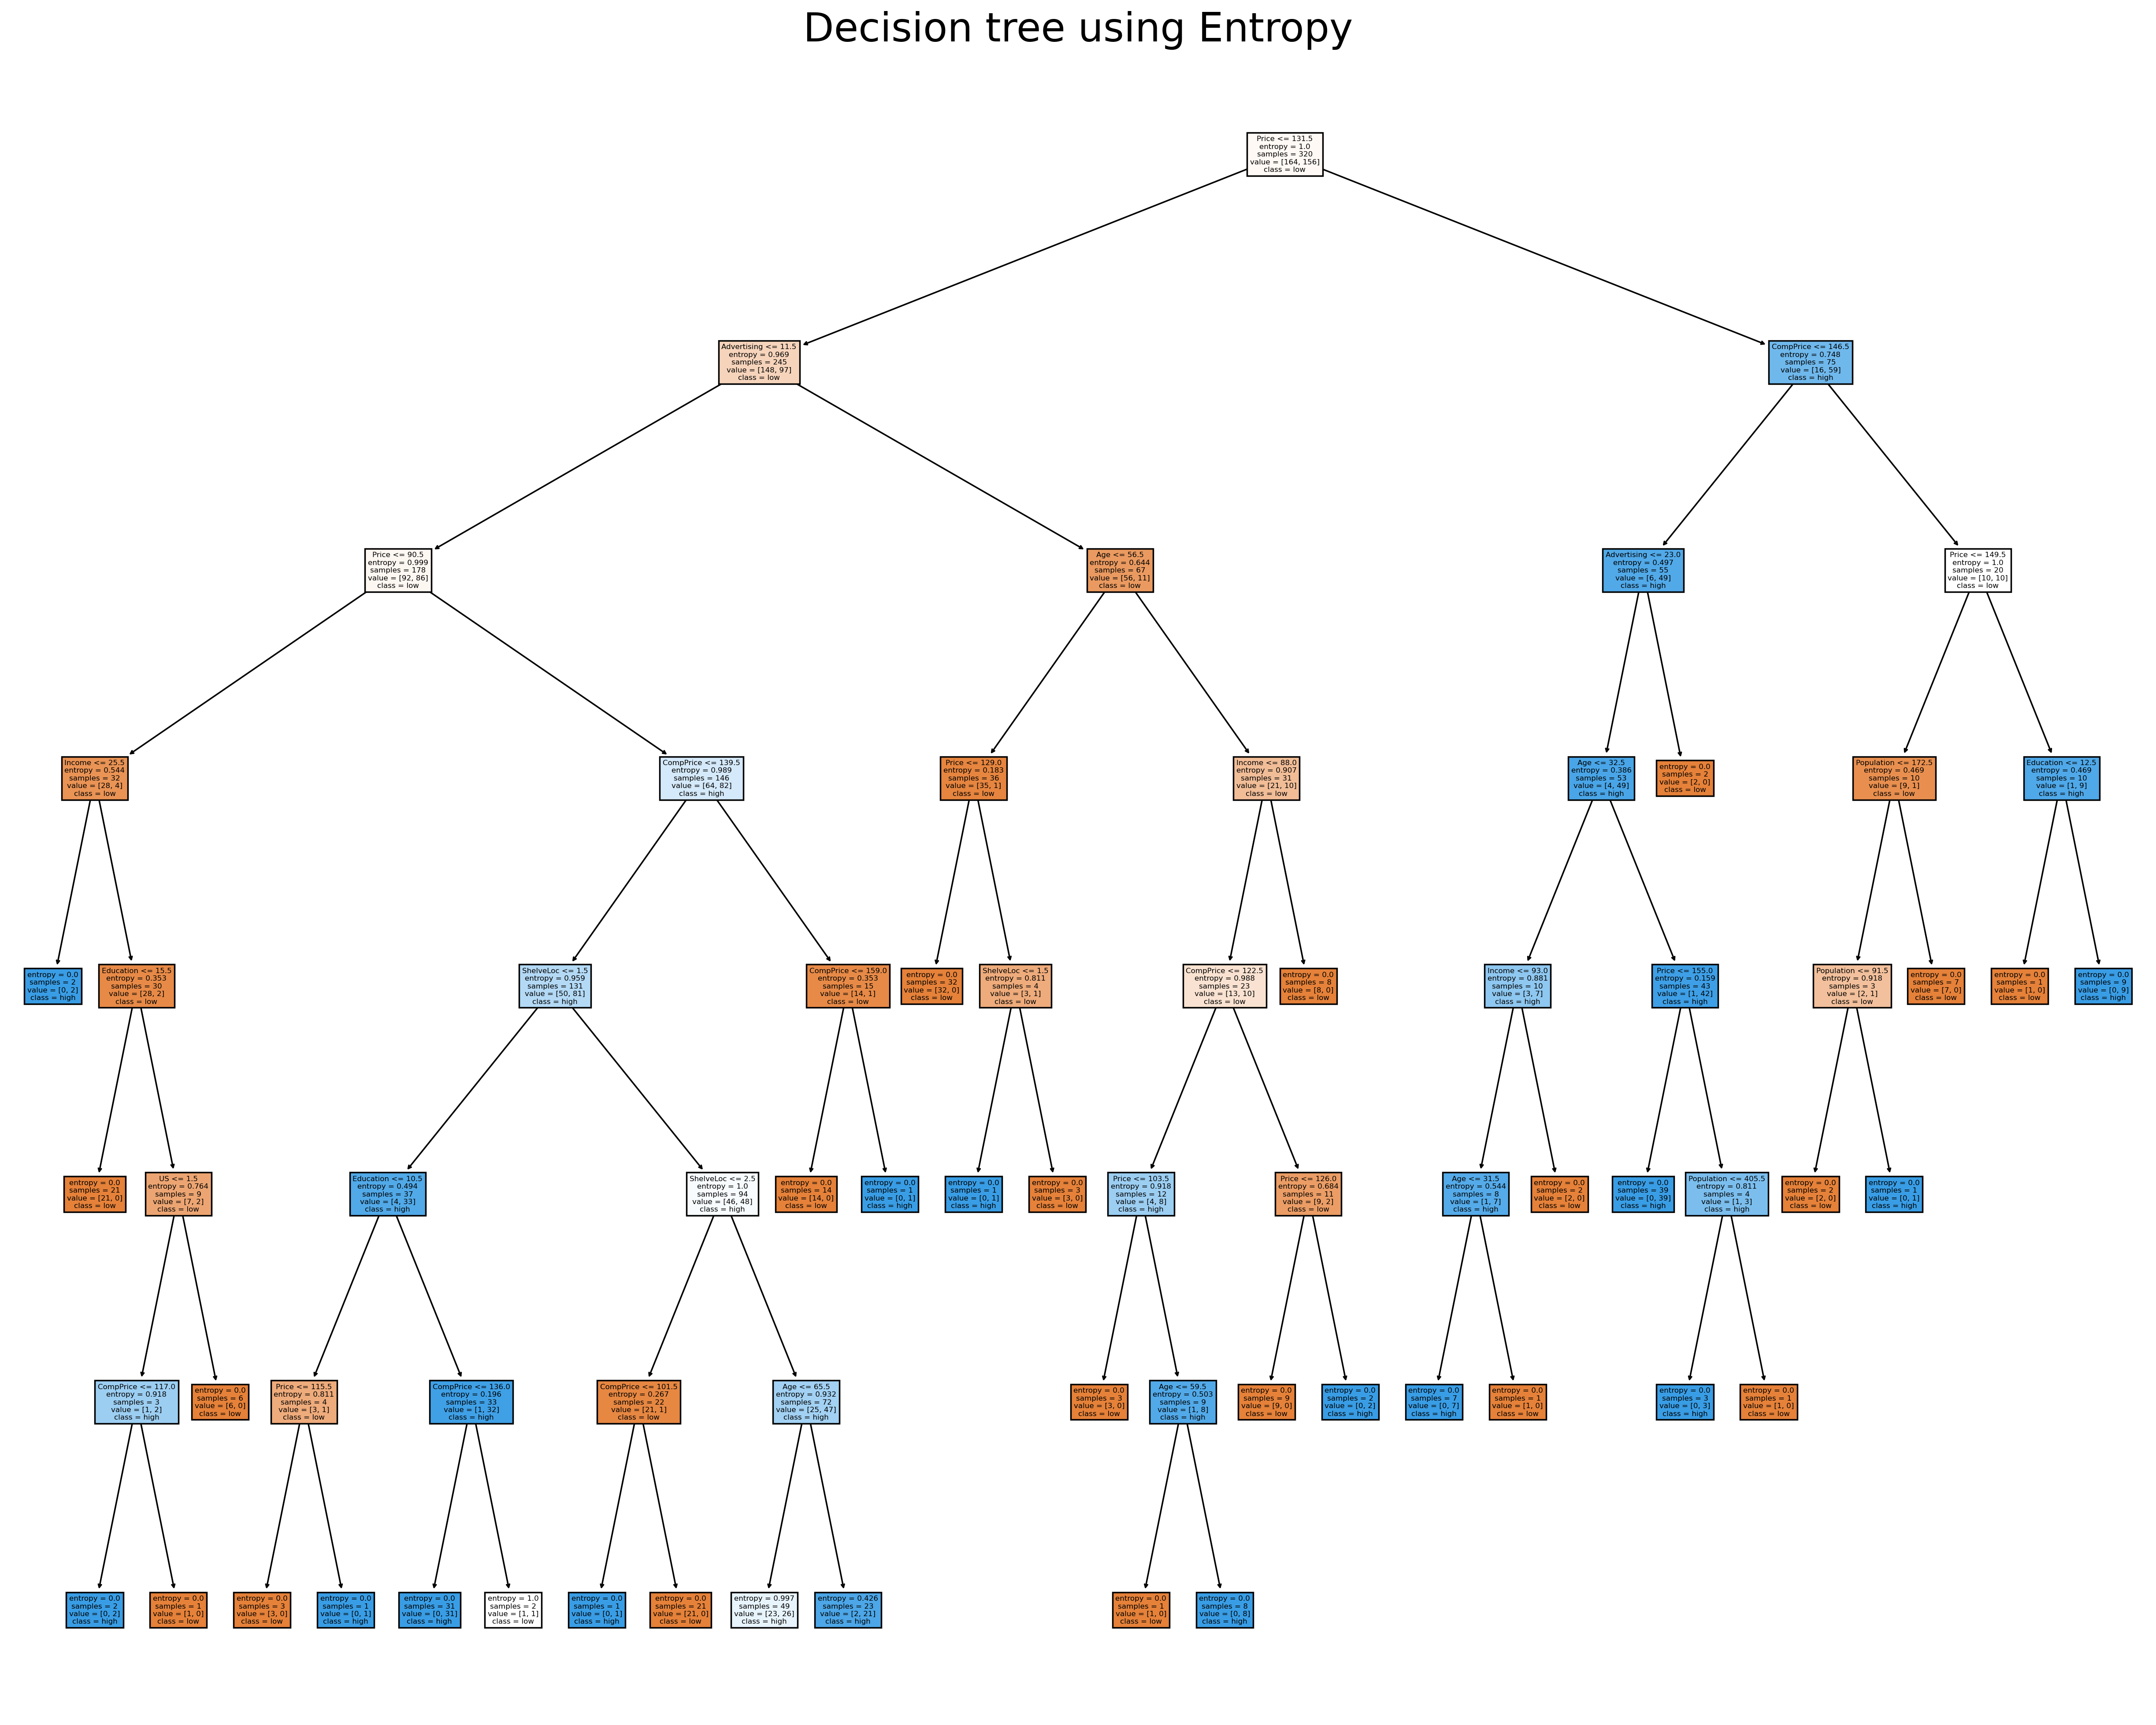

In [20]:
fig = plt.figure(figsize=(25,20), dpi=250)
fig = tree.plot_tree(model2, feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=26)
plt.savefig('Dectree.pdf')

## Building Decision Tree Classifier (CART) using Gini Criteria

In [21]:
modelgini = DecisionTreeClassifier(criterion='gini', max_depth=5)
modelgini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
predg = modelgini.predict(x_test)

print('Test data Accuracy is : ', accuracy_score(y_test, predg))

predgt = modelgini.predict(x_train)

print('Train data Accuracy is : ', accuracy_score(y_train, predgt))

Test data Accuracy is :  0.7375
Train data Accuracy is :  0.8875


In [23]:
modelgini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
modelgini2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [24]:
predg2 = modelgini2.predict(x_test)

print('Test data Accuracy is : ', accuracy_score(y_test, predg2))

predgt2 = modelgini2.predict(x_train)

print('Train data Accuracy is : ', accuracy_score(y_train, predgt2))

Test data Accuracy is :  0.6875
Train data Accuracy is :  0.925


In [25]:
modelgini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
modelgini3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [26]:
predg3 = modelgini3.predict(x_test)

print('Test data Accuracy is : ', accuracy_score(y_test, predg3))

predgt3 = modelgini3.predict(x_train)

print('Train data Accuracy is : ', accuracy_score(y_train, predgt3))

Test data Accuracy is :  0.675
Train data Accuracy is :  0.96875


#### Plotting the Decision Tree

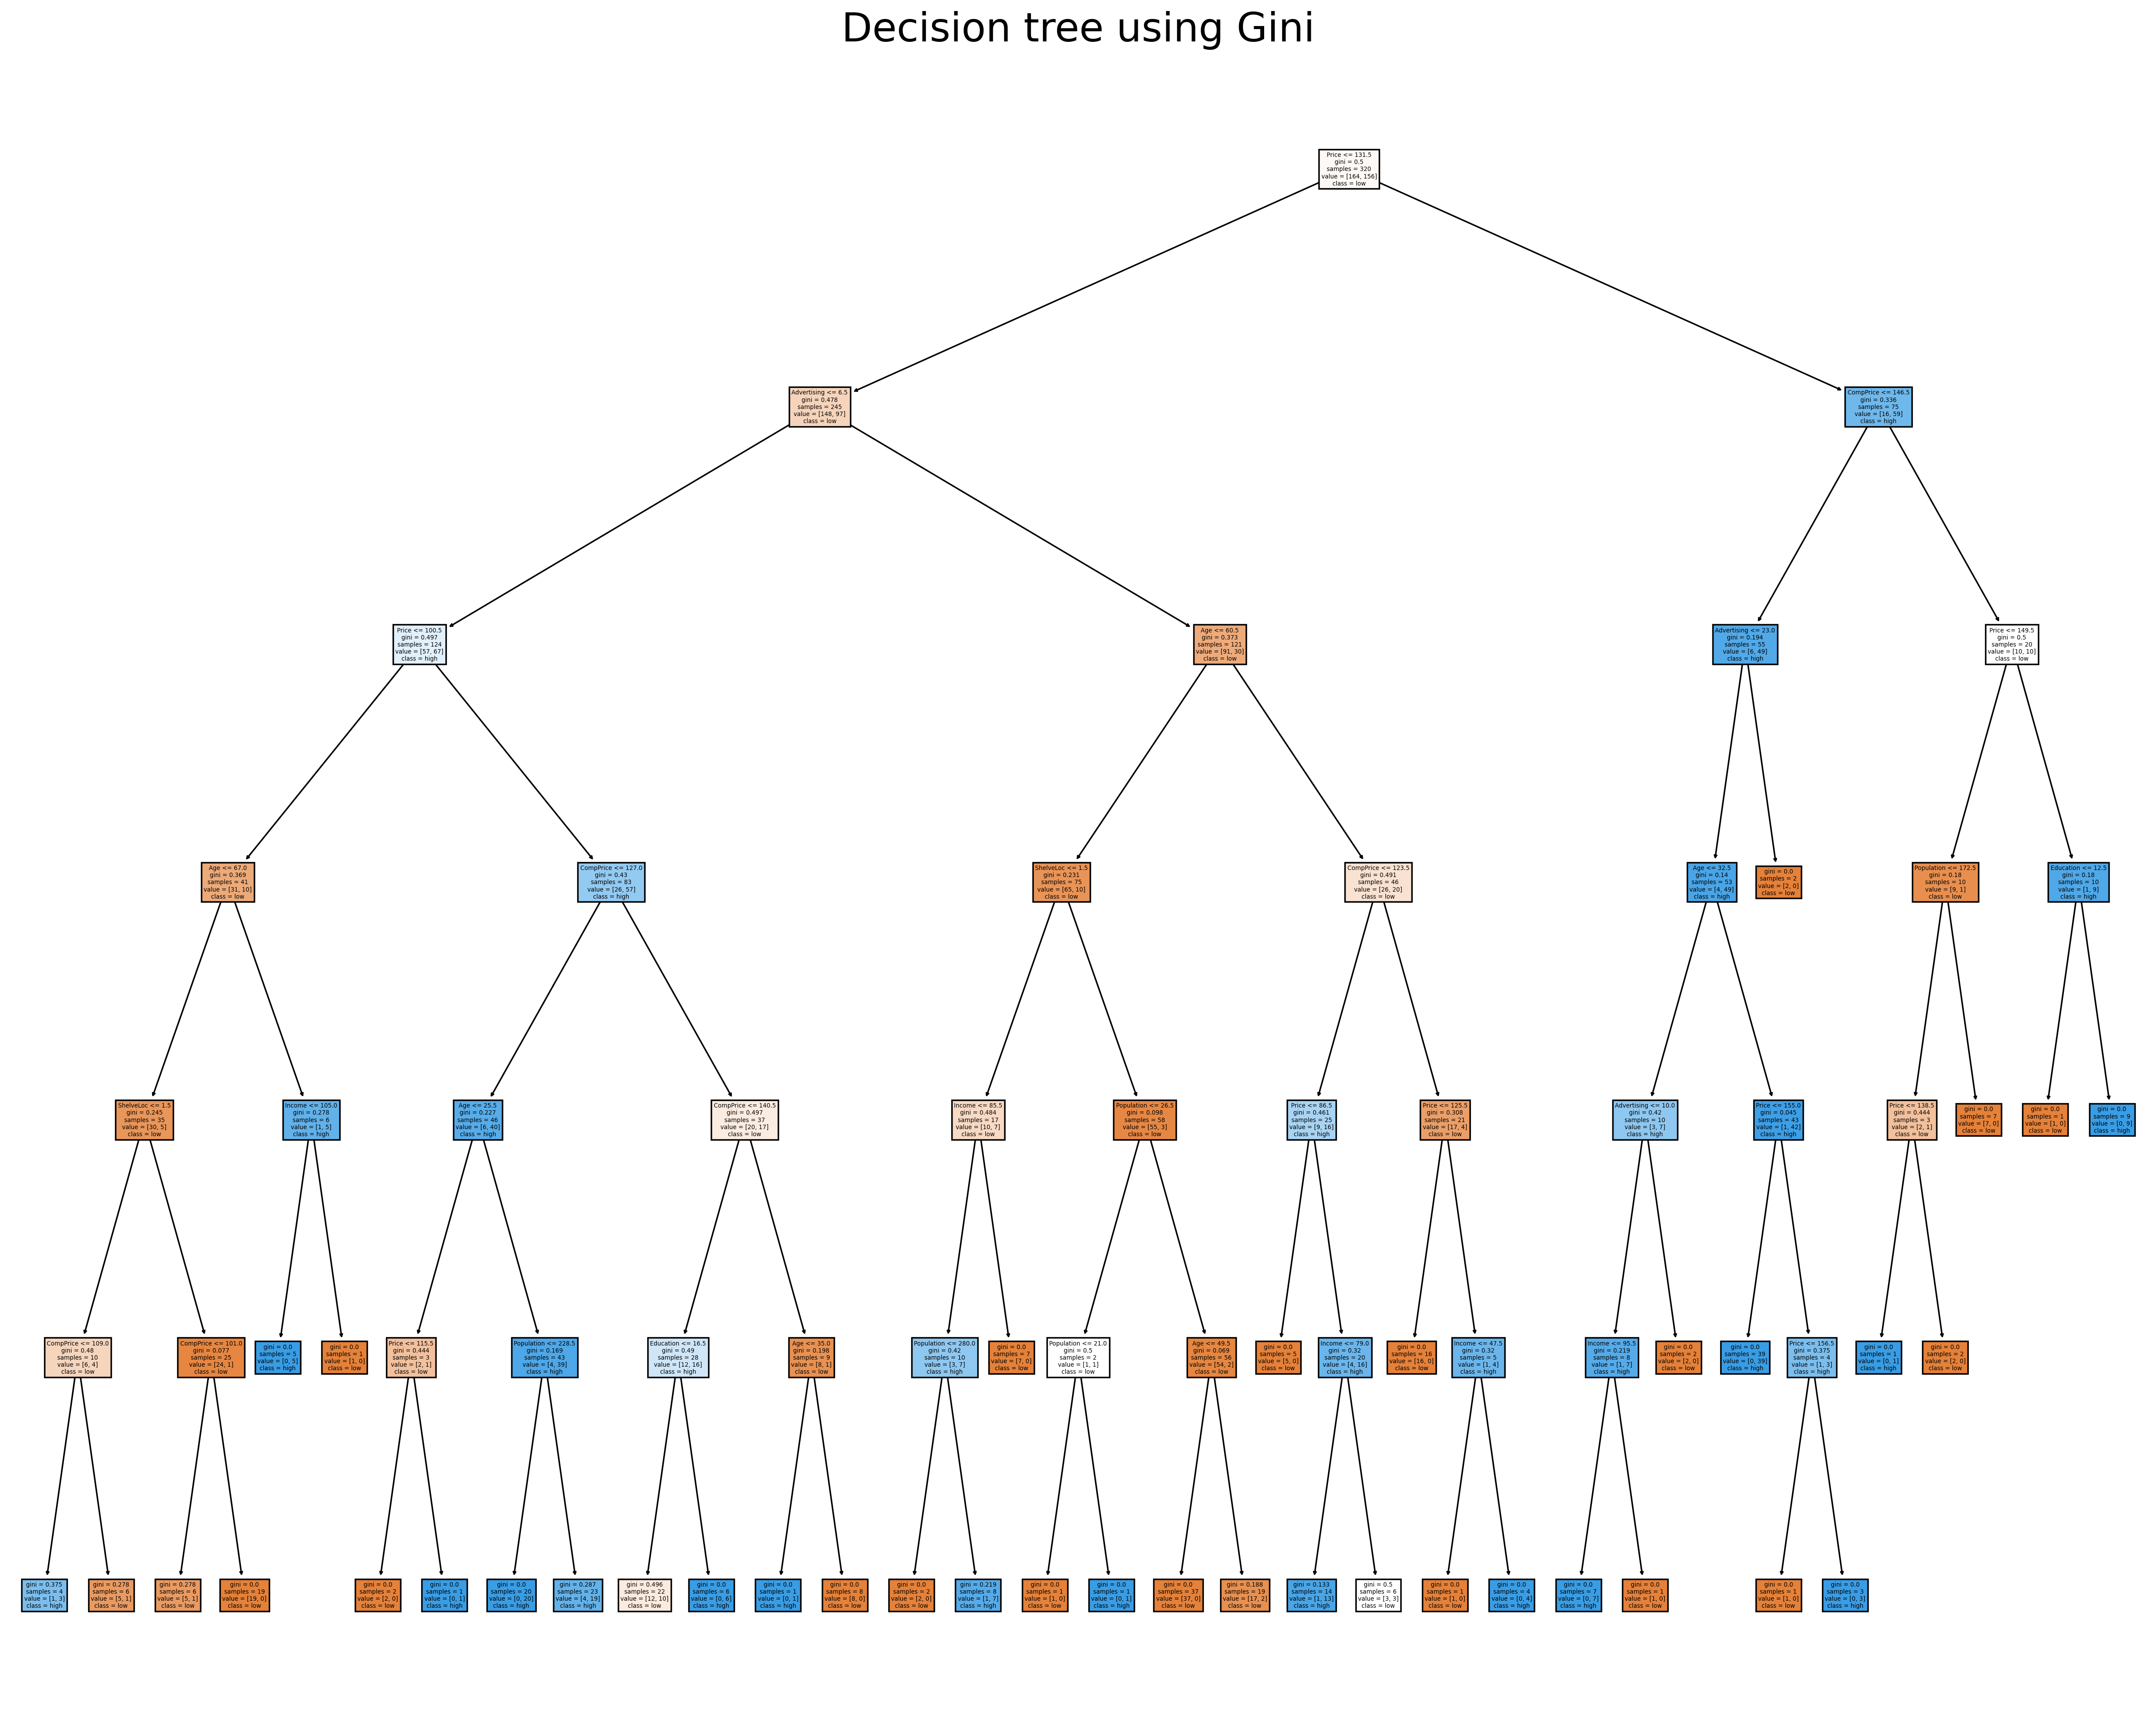

In [27]:
fig = plt.figure(figsize=(25,20), dpi=250)
fig = tree.plot_tree(modelgini2, feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=26)
plt.savefig('Dectreeg.pdf')

In [28]:
preds = modelgini3.predict(x_test)
pd.Series(preds).value_counts()

high    43
low     37
dtype: int64

In [29]:
preds

array(['low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'high'], dtype=object)

In [30]:
pd.crosstab(y_test,preds)

col_0  high  low
sales           
high     26    9
low      17   28

In [31]:
np.mean(preds==y_test)*100

67.5

Classification Report 

:                precision    recall  f1-score   support

        high       0.60      0.74      0.67        35
         low       0.76      0.62      0.68        45

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.69      0.68      0.68        80



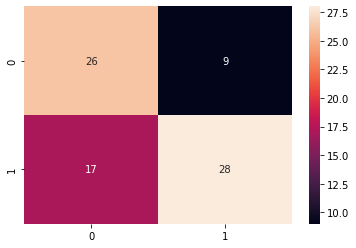

In [32]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
print('Classification Report \n\n: ', classification_report(y_test,preds))

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not



In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, tree, preprocessing
from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RF

In [34]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [35]:
fraud = fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income', 'City.Population':'City_Population', 'Work.Experience':'Work_Experience'})

In [36]:
fraud

Undergrad Marital_Status  Taxable_Income  City_Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [37]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [38]:
fraud.describe()

Taxable_Income  City_Population  Work_Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

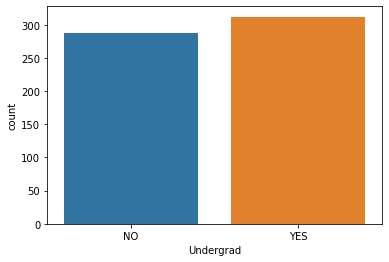

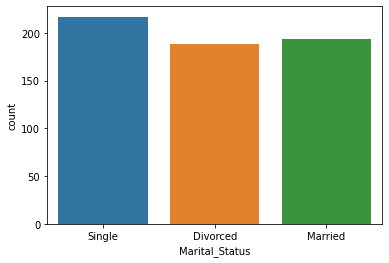

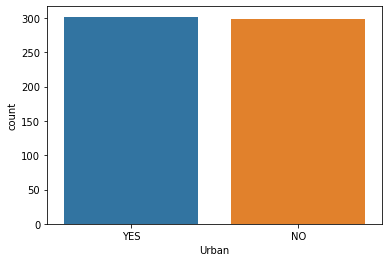

In [39]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(fraud['Undergrad'])
plt.show()

sns.countplot(fraud['Marital_Status'])
plt.show()

sns.countplot(fraud['Urban'])
plt.show()

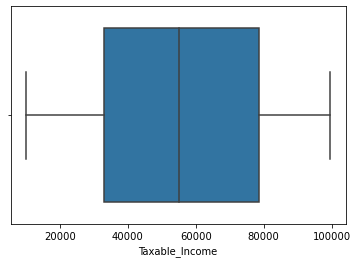

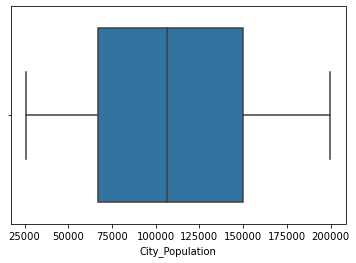

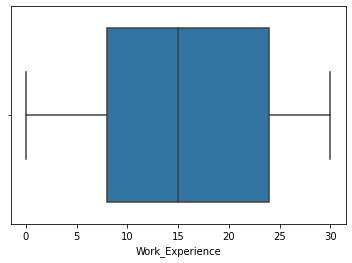

In [40]:
sns.boxplot(fraud['Taxable_Income'])
plt.show()

sns.boxplot(fraud['City_Population'])
plt.show()

sns.boxplot(fraud['Work_Experience'])
plt.show()

##### Correlation analysis for data

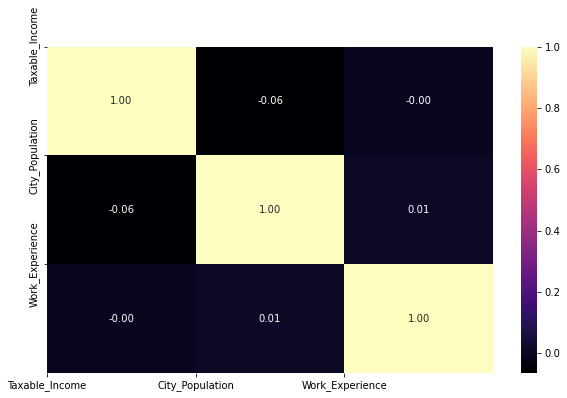

In [41]:
corr = fraud.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

#### Creating dummy vairables for 'Undergrad','Marital_Status','Urban' dropping first dummy variable

In [42]:
fraud1 = pd.get_dummies(fraud, columns=['Undergrad', 'Marital_Status', 'Urban'], drop_first=True)
fraud1

Taxable_Income  City_Population  Work_Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital_Status_Married  Marital_Status_Single  Urban_YES  
0                         0                      1          1  
1                         0                      0          1  
2                         1                      0          1  
3                         0                      1          1  
4                         1                      0          0  
..                      ...                    ...        ...  
595                       0                      0          1  
596                       0                      0          1  
597                       0                      0          1  
598                       1                      0          0  
599                       0                      0          0  

[600 rows x 7 columns]

Creating new cols TaxInc and dividing 'Taxable_Income' cols on the basis of 10002, 30000, 99620 for Risky and Good

In [43]:
fraud1['TaxInc'] = pd.cut(fraud1['Taxable_Income'], bins = [10002, 30000, 99620], labels = ['Risky', 'Good'])

In [44]:
fraud1

Taxable_Income  City_Population  Work_Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital_Status_Married  Marital_Status_Single  Urban_YES TaxInc  
0                         0                      1          1   Good  
1                         0                      0          1   Good  
2                         1                      0          1   Good  
3                         0                      1          1   Good  
4                         1                      0          0   Good  
..                      ...                    ...        ...    ...  
595                       0                      0          1   Good  
596                       0                      0          1   Good  
597                       0                      0          1   Good  
598                       1                      0          0   Good  
599                       0                      0          0   Good  

[600 rows x 8 columns]

### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

After creation of new col TaxInc also made its dummies var concating right side of fraud1

In [45]:
fraud1 = pd.get_dummies(fraud1, columns=['TaxInc'], drop_first=True)

In [46]:
fraud1

Taxable_Income  City_Population  Work_Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital_Status_Married  Marital_Status_Single  Urban_YES  TaxInc_Good  
0                         0                      1          1            1  
1                         0                      0          1            1  
2                         1                      0          1            1  
3                         0                      1          1            1  
4                         1                      0          0            1  
..                      ...                    ...        ...          ...  
595                       0                      0          1            1  
596                       0                      0          1            1  
597                       0                      0          1            1  
598                       1                      0          0            1  
599                       0                      0          0            1  

[600 rows x 8 columns]

##### let's plot pair plot to visualise the attributes all at once

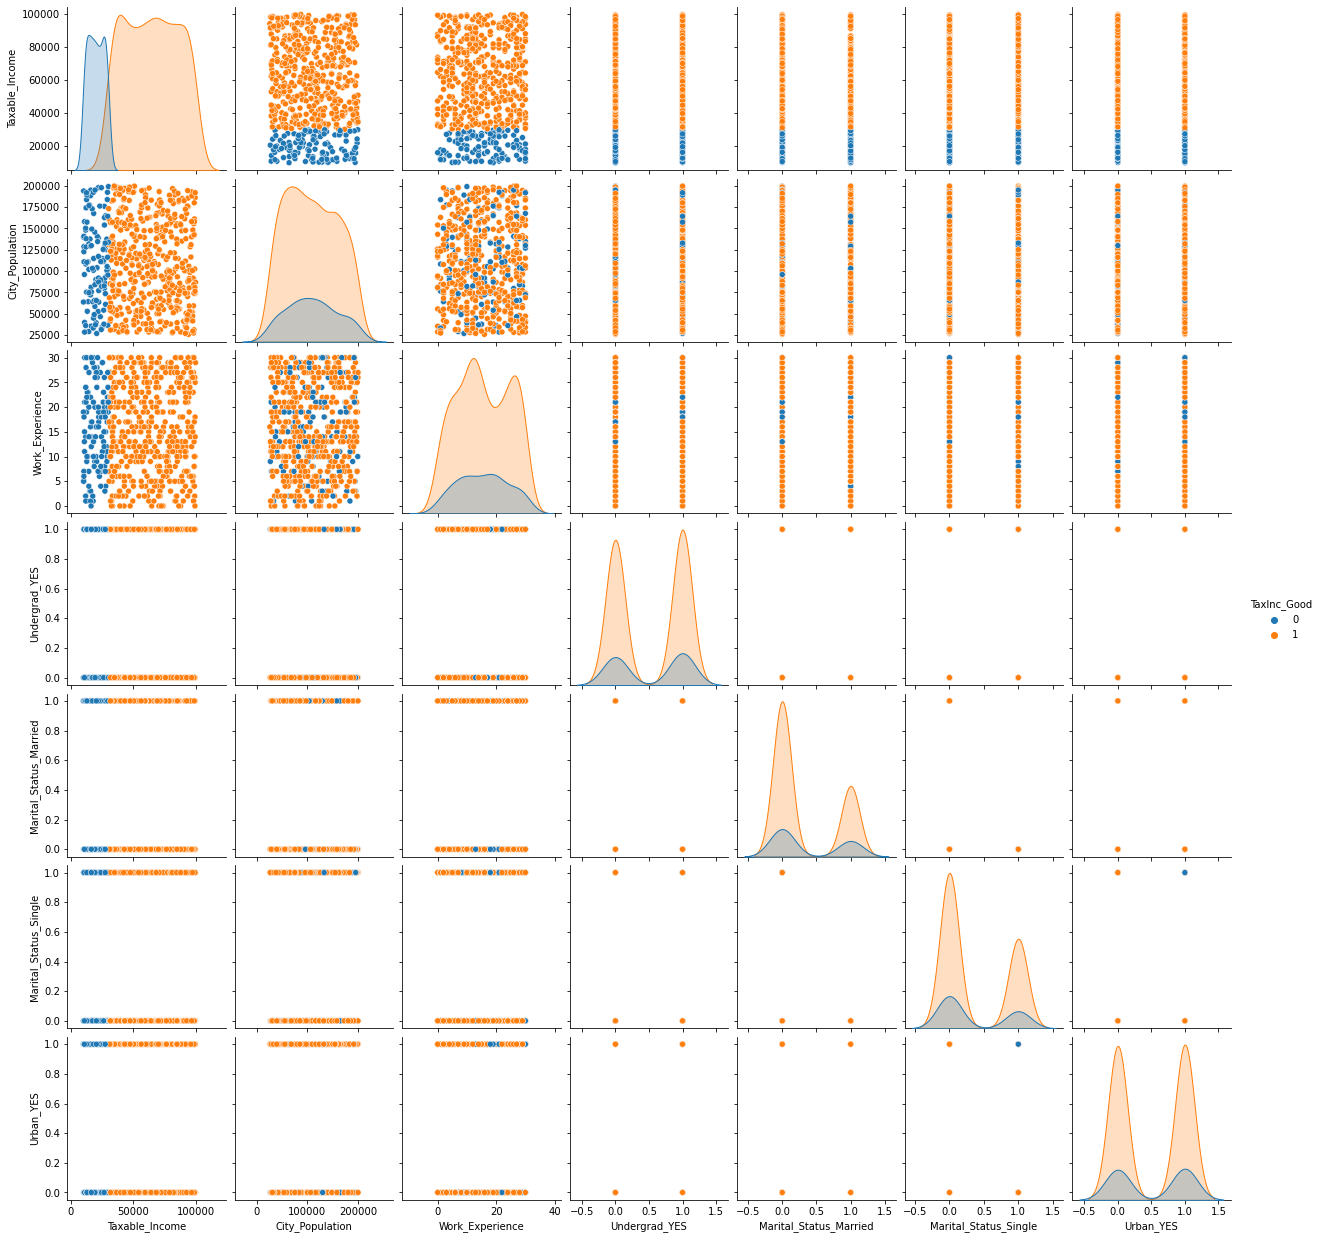

In [47]:
sns.pairplot(data=fraud1, hue='TaxInc_Good')

#### Normalization Function

In [48]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

In [49]:
fraud_norm = norm_func(fraud1.iloc[:,1:])
fraud_norm

City_Population  Work_Experience  Undergrad_YES  Marital_Status_Married  \
0           0.139472         0.333333            0.0                     0.0   
1           0.622394         0.600000            1.0                     0.0   
2           0.772568         1.000000            0.0                     1.0   
3           0.962563         0.500000            1.0                     0.0   
4           0.010081         0.933333            0.0                     1.0   
..               ...              ...            ...                     ...   
595         0.078811         0.233333            1.0                     0.0   
596         0.170058         0.066667            1.0                     0.0   
597         0.737240         0.000000            0.0                     0.0   
598         0.886810         0.566667            1.0                     1.0   
599         0.760683         0.533333            0.0                     0.0   

     Marital_Status_Single  Urban_YES  TaxInc_Good  
0                      1.0        1.0          1.0  
1                      0.0        1.0          1.0  
2                      0.0        1.0          1.0  
3                      1.0        1.0          1.0  
4                      0.0        0.0          1.0  
..                     ...        ...          ...  
595                    0.0        1.0          1.0  
596                    0.0        1.0          1.0  
597                    0.0        1.0          1.0  
598                    0.0        0.0          1.0  
599                    0.0        0.0          1.0  

[600 rows x 7 columns]

#### Declaring features and target

In [50]:
x = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Converting the Taxable income variable to bucketing

In [52]:
fraud_norm['income'] = '<=30000'
fraud_norm.loc[fraud1['Taxable_Income'] >= 30000, 'income'] = 'Good'
fraud_norm.loc[fraud1['Taxable_Income'] <= 30000, 'income'] = 'Risky'

##### Dropping the taxable income variable

In [53]:
fraud1.drop(['Taxable_Income'], axis=1, inplace=True)

In [54]:
le = preprocessing.LabelEncoder()
for column_name in fraud1.columns:
    if fraud1[column_name].dtype == object:
        fraud1[column_name] = le.fit_transform(fraud1[column_name])
        
    else:
        pass

##### Splitting the data into features and labels

In [55]:
features = fraud1.iloc[:,0:5]
labels = fraud1.iloc[:,5]

In [56]:
colnames = list(fraud1.columns)
predictors = colnames[0:5]
target = colnames[5]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, labels,test_size = 0.2, stratify = labels)

##### Model Building

In [58]:
model = RF(n_jobs=3, n_estimators=15, oob_score=True, criterion='entropy')
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [59]:
print(model.classes_)
print(model.n_features_)
model.n_classes_

[0 1]
5


2

In [60]:
model.n_outputs_

1

In [61]:
model.oob_score_

0.5458333333333333

##### Prediction on train data

In [62]:
predtrain = model.predict(x_train)

##### Accuracy

In [63]:
acc = accuracy_score(y_train, predtrain)

In [64]:
np.mean(predtrain == y_train)

0.9833333333333333

##### Confusion Matrix

In [65]:
confusion = confusion_matrix(y_train, predtrain)

In [66]:
predtest = model.predict(x_test)

##### Accuracy

In [67]:
acc_test = accuracy_score(y_test, predtest)

In [68]:
np.mean(predtest == y_test)

0.45

### Building Decision Tree Classifier using Entropy Criteria

In [69]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

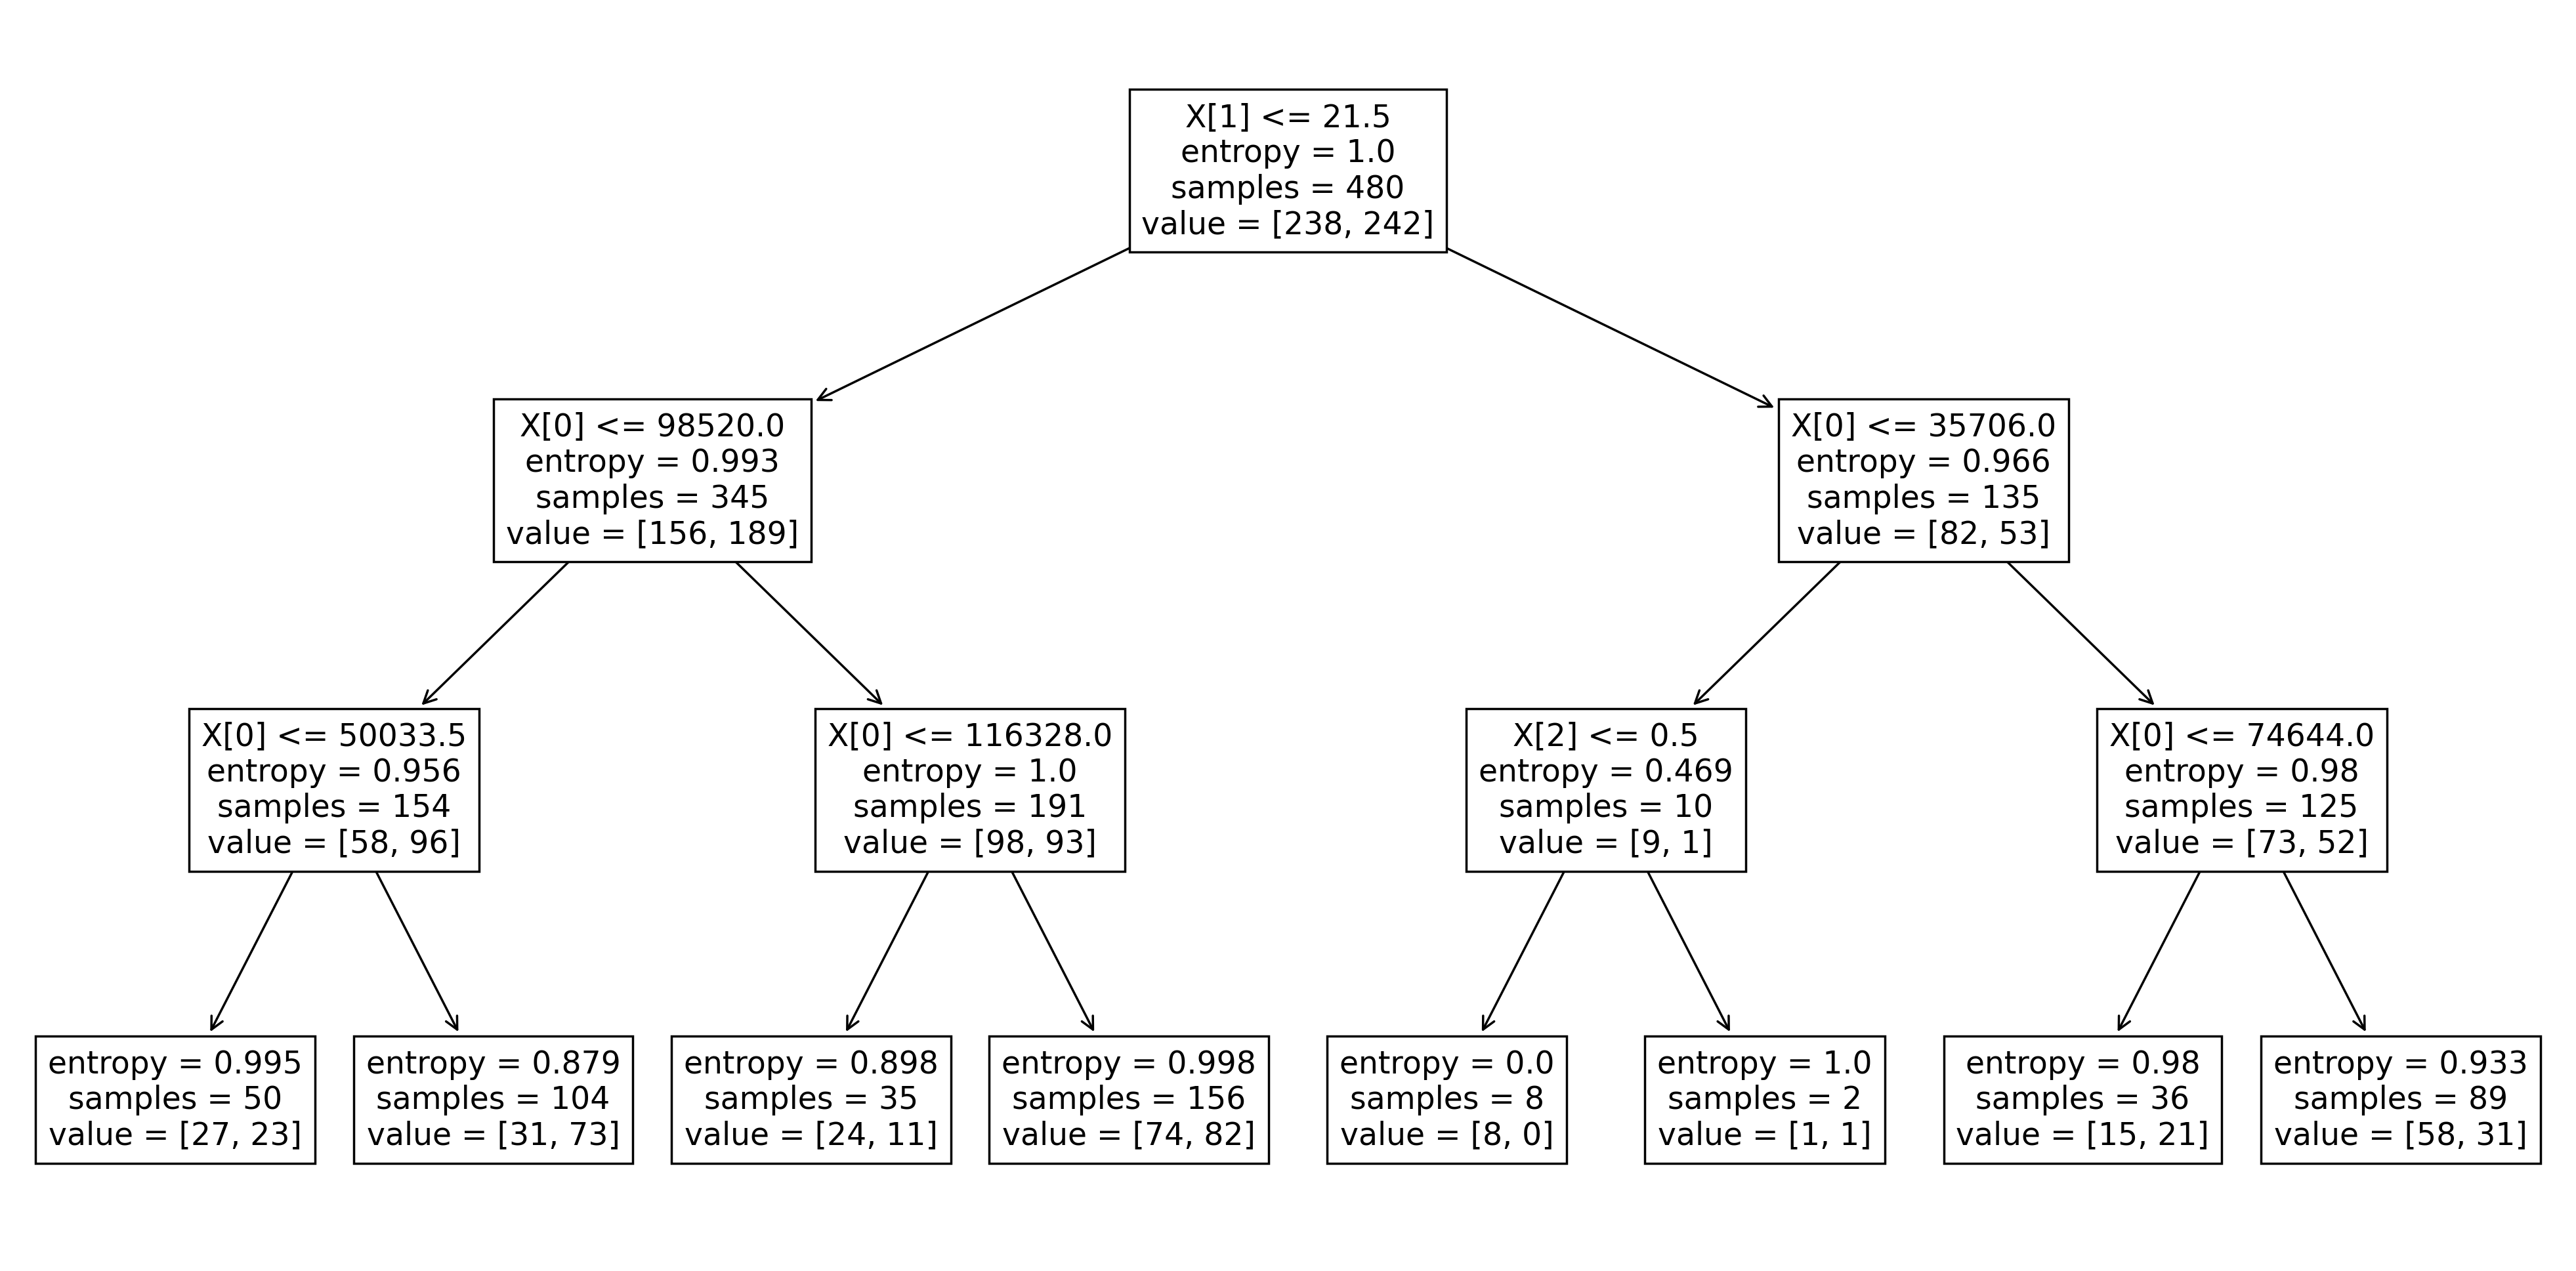

In [70]:
plt.figure(figsize=[20,10], dpi=250)
tree.plot_tree(model);

In [71]:
colnames = list(fraud1.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_YES',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_YES',
 'TaxInc_Good']

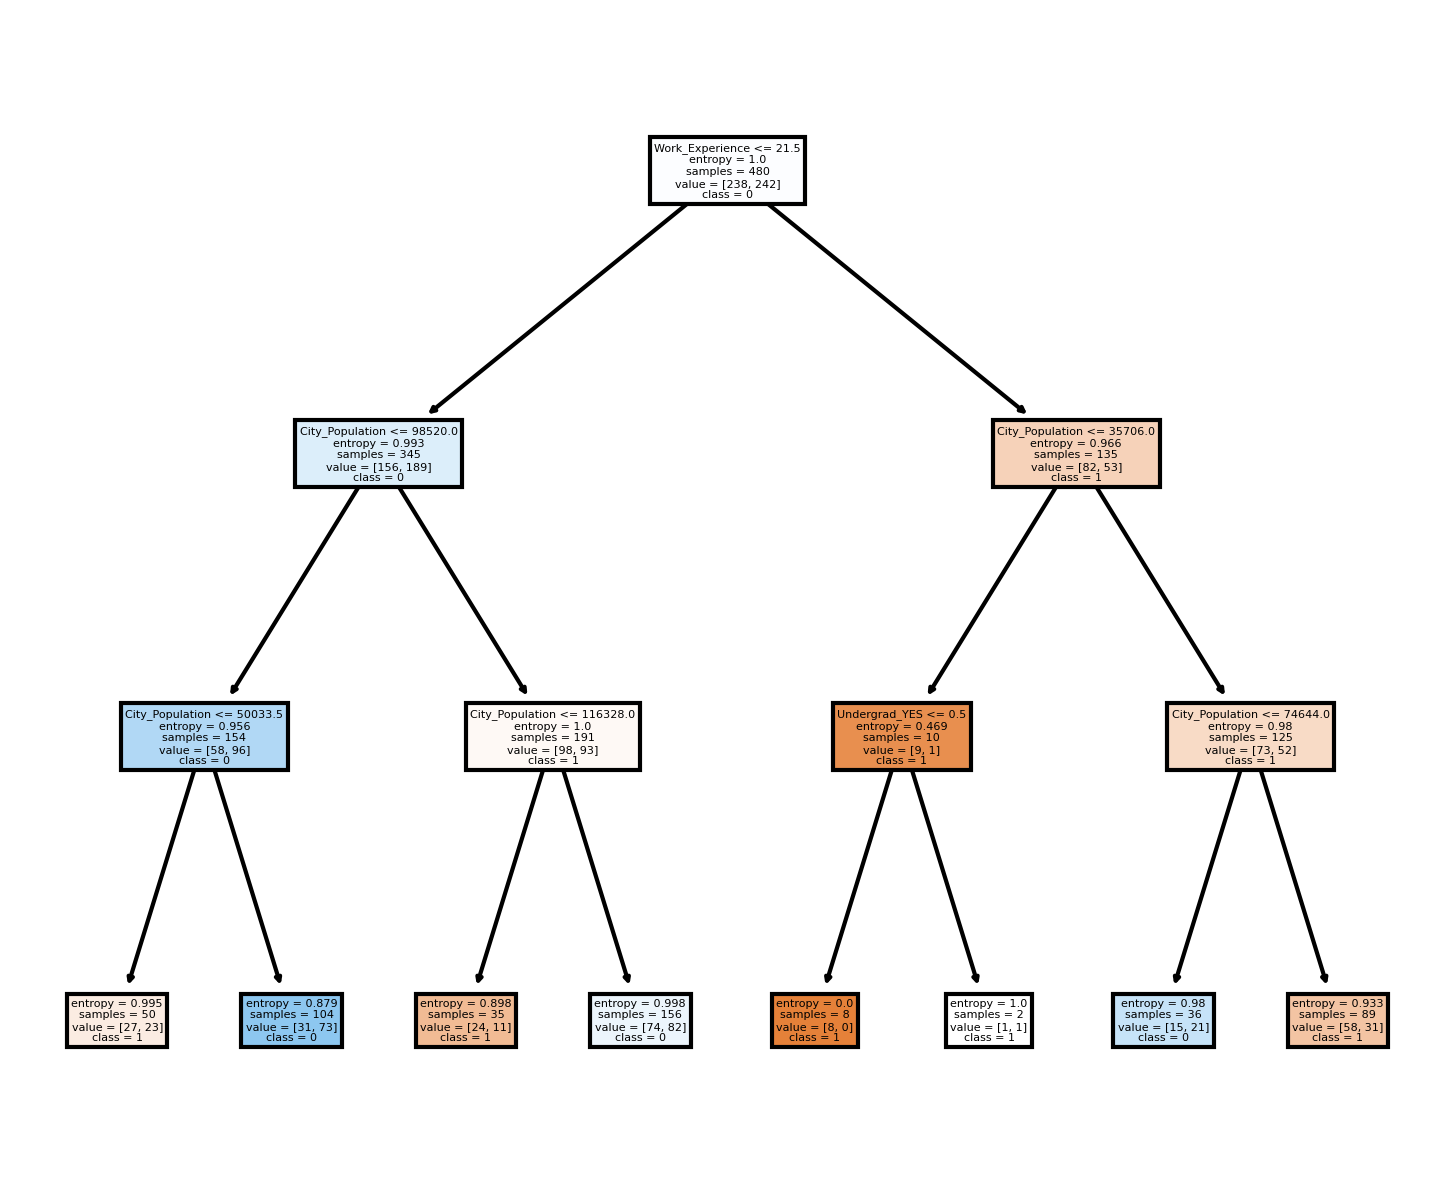

In [72]:
fn = ['City_Population', 'Work_Experience', 'Undergrad_YES', 'Marital_Status_Married', 'Marital_Status_Single', 'Urban_YES', 'TaxInc_Good']
cn = ['1', '0']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), dpi=300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True);

##### Predicting on test data

In [73]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts() 

1    69
0    51
dtype: int64

In [74]:
preds

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=uint8)

In [75]:
pd.crosstab(y_test,preds)

col_0       0   1
Urban_YES        
0          26  34
1          25  35

In [76]:
np.mean(preds == y_test)

0.5083333333333333

### Building Decision Tree Classifier (CART) using Gini Criteria

In [77]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [78]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Plotting Decision Tree

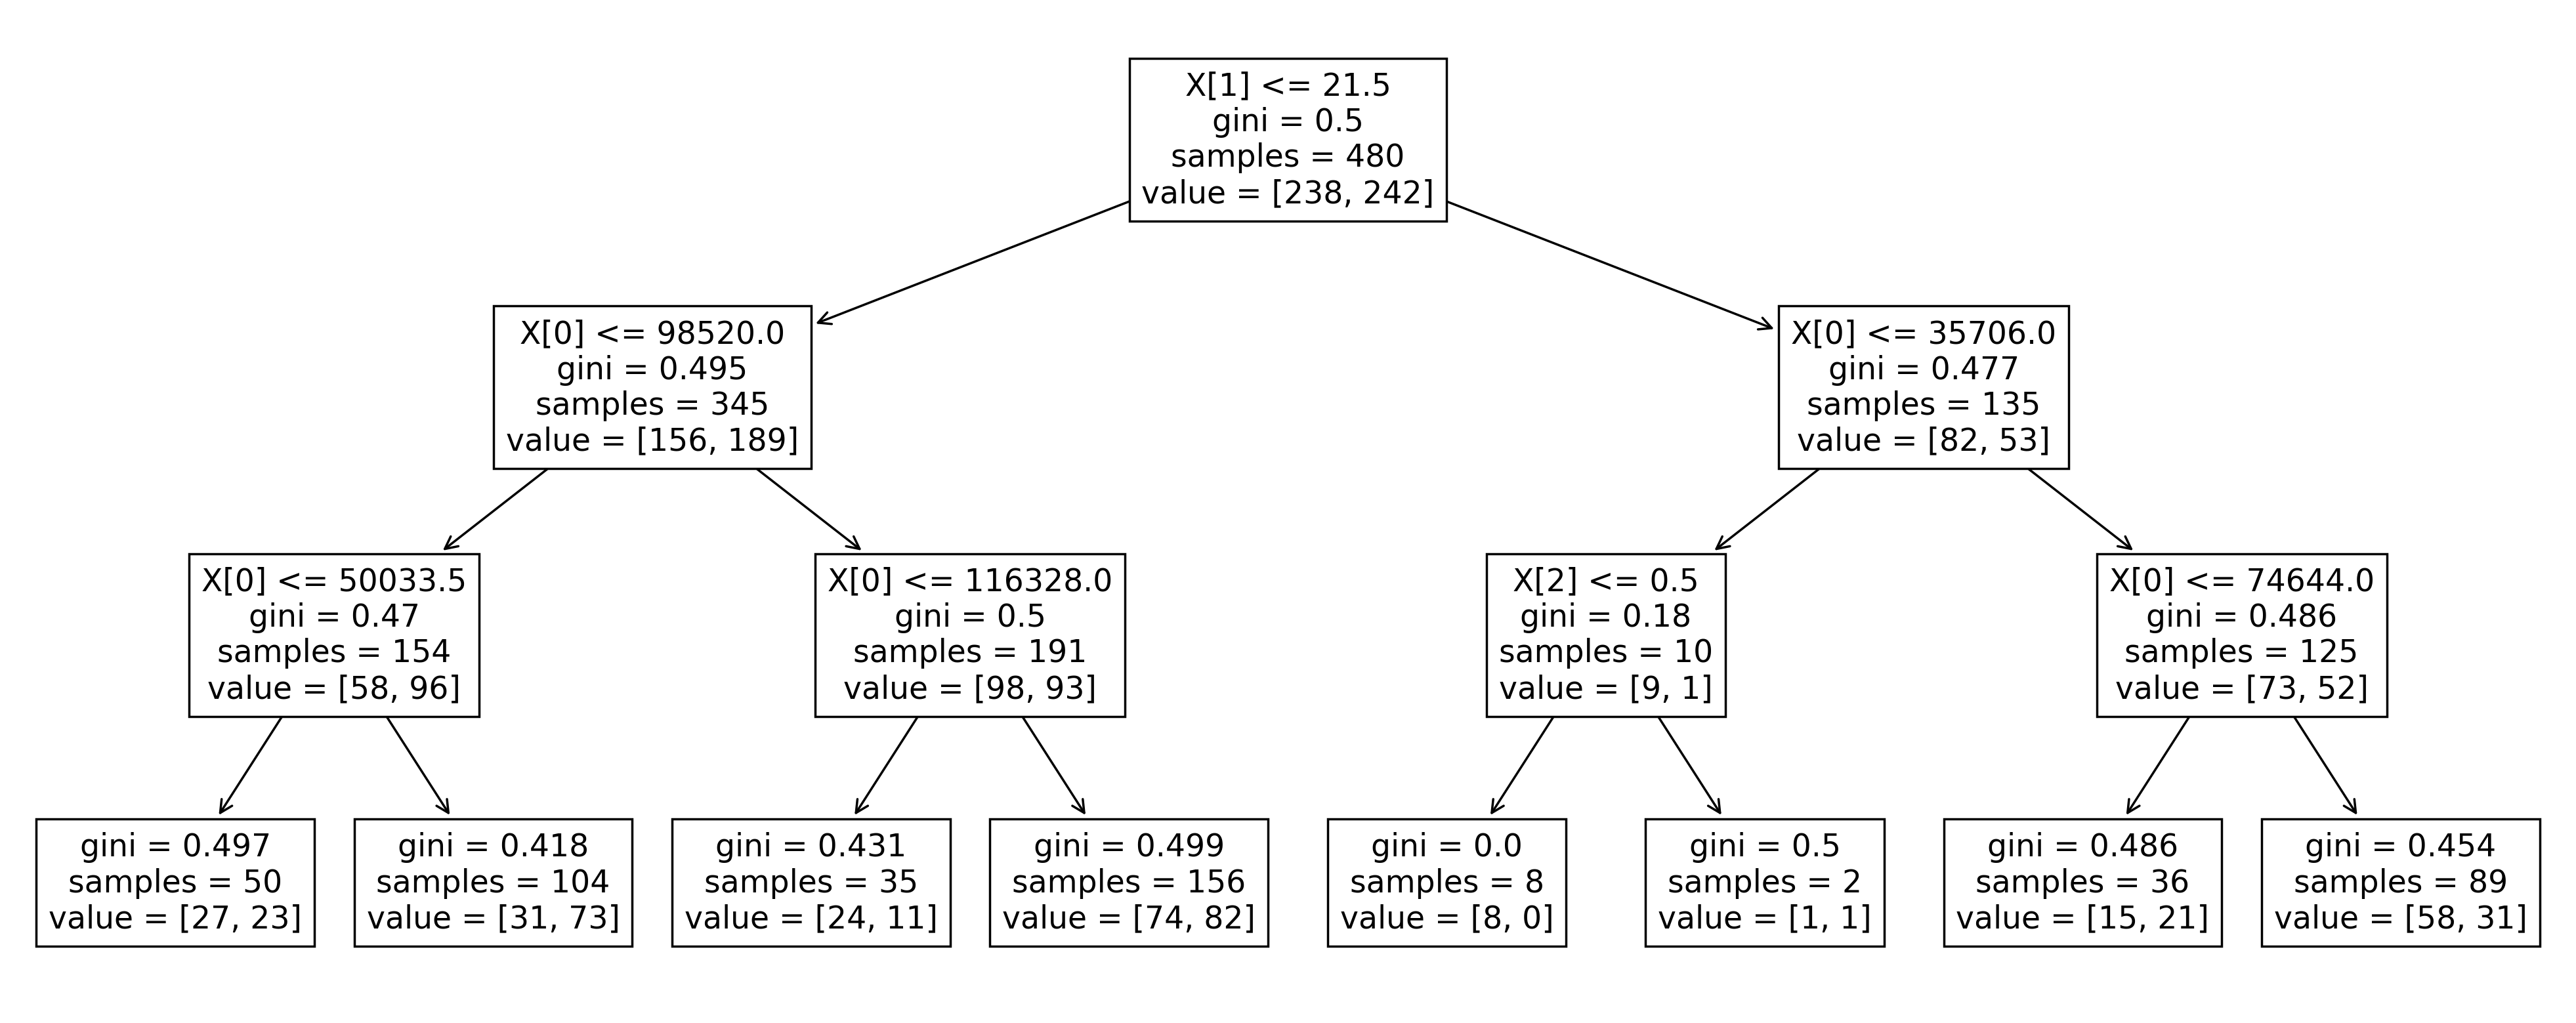

In [79]:
plt.figure(figsize=[20,8], dpi=250)
tree.plot_tree(model_gini);

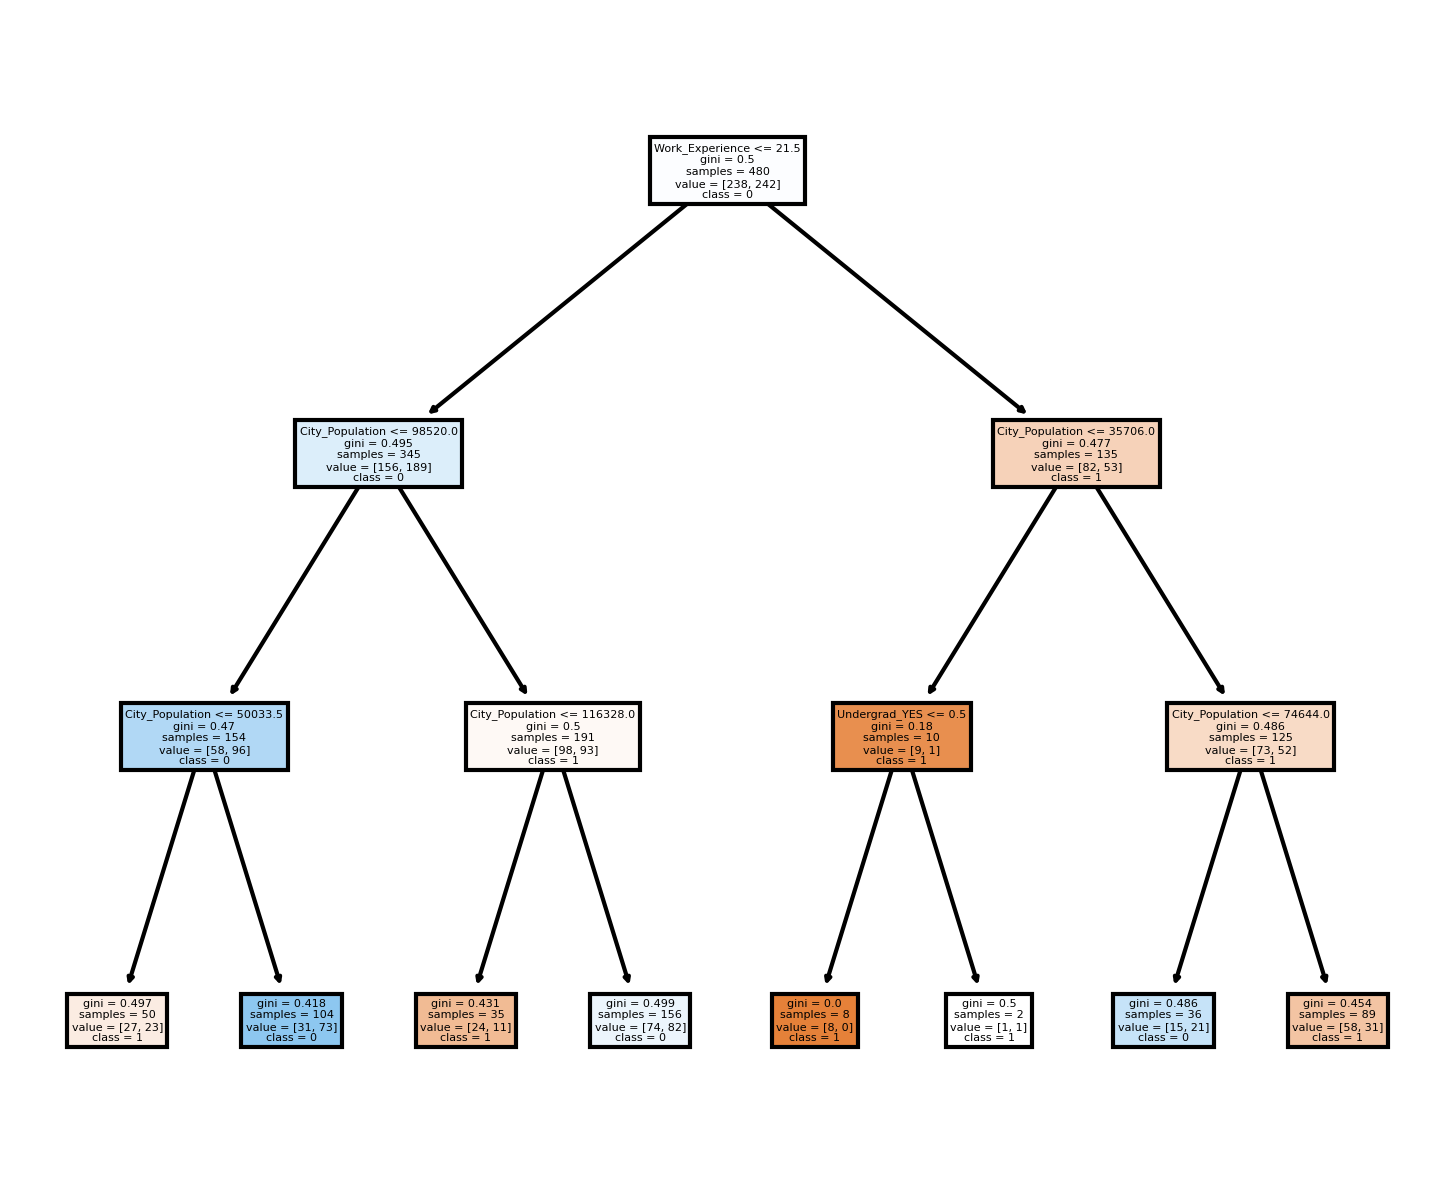

In [80]:
fn = ['City_Population', 'Work_Experience', 'Undergrad_YES', 'Marital_Status_Married', 'Marital_Status_Single', 'Urban_YES', 'TaxInc_Good']
cn = ['1', '0']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), dpi=300)
tree.plot_tree(model_gini, feature_names=fn, class_names=cn, filled=True);

##### Prediction and computing the accuracy

In [81]:
pred = model_gini.predict(x_test)
np.mean(pred == y_test)

0.5083333333333333

In [82]:
pd.Series(pred).value_counts()

1    69
0    51
dtype: int64

In [83]:
pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=uint8)

##### Creating cross tables for checking model

In [84]:
pd.crosstab(y_test, pred)

col_0       0   1
Urban_YES        
0          26  34
1          25  35

##### Checking accuracy of model

In [85]:
model_gini.score(x_test, y_test)

0.5083333333333333

### Decision Tree Regression Example

In [86]:
array = fraud1.values
X = array[:,0:3]
Y = array[:,3]

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [88]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

##### Accuracy

In [89]:
model_reg.score(X_test, Y_test)

-0.9393656716417913